In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


# Importing Library and Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
data=pd.read_csv('/kaggle/input/drug-classification/drug200.csv')

In [4]:
data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
data.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [6]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
data.shape

(200, 6)

In [8]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

# Visualizing for Intuition

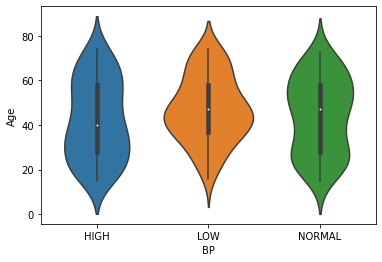

In [9]:
sns.violinplot(x=data.BP, y=data.Age, data=data)

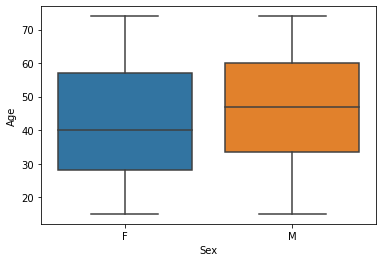

In [10]:
sns.boxplot(x=data.Sex, y=data.Age, data=data)

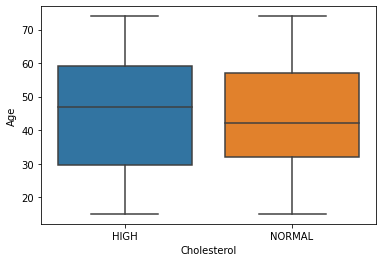

In [11]:
sns.boxplot(x=data.Cholesterol, y=data.Age, data=data)

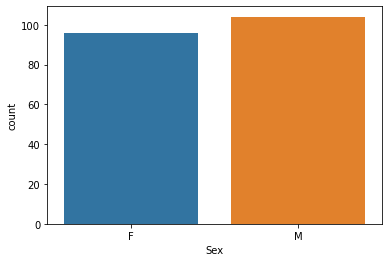

In [12]:
sns.countplot(x=data.Sex,data=data)

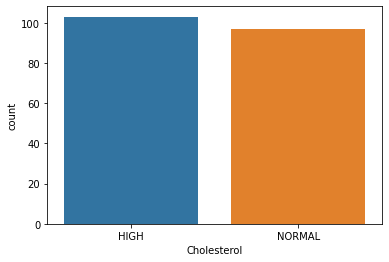

In [13]:
sns.countplot(x=data.Cholesterol,data=data)

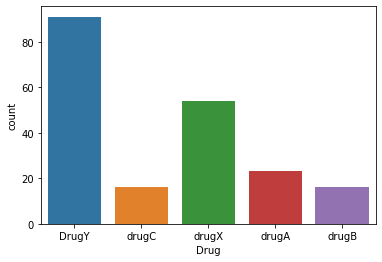

In [14]:
sns.countplot(x=data.Drug,data=data)

# Data Preprocessing Steps

In [15]:
lb=LabelEncoder()
data.Sex=lb.fit_transform(data.Sex)
data.BP=lb.fit_transform(data.BP)
data.Cholesterol=lb.fit_transform(data.Cholesterol)

In [16]:
data.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC


In [17]:
BP=data['BP']
BP_=pd.get_dummies(BP,drop_first=True)
BP_.head(2)

,1,2
0,0,0
1,1,0


In [19]:
y=data['Drug']
y=lb.fit_transform(y)

In [20]:
data.drop(['BP','Drug'],axis=1,inplace=True)


In [21]:
new=pd.concat([data,BP_],axis=1)

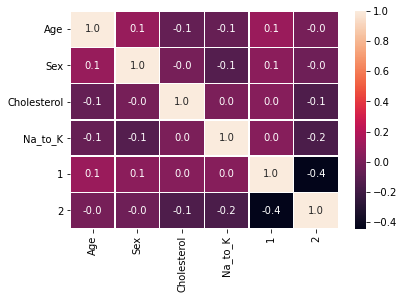

In [22]:
sns.heatmap(new.corr(),annot=True,fmt='.1f',linewidths=0.5)

In [23]:
X=new

# Splitting DATASET

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,shuffle=True)

In [25]:
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

In [26]:
rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_1=rf.predict(X_test)
y_2=knn.predict(X_test)
y_3=dtc.predict(X_test)


In [28]:
print('accuracy score 1: ',accuracy_score(y_test,y_1))
print('accuracy score 2: ',accuracy_score(y_test,y_2))
print('accuracy score 3: ',accuracy_score(y_test,y_3))

accuracy score 1:  1.0
accuracy score 2:  0.66
accuracy score 3:  1.0


In [29]:
cmap1=confusion_matrix(y_test, y_1)
cmap2=confusion_matrix(y_test, y_2)
cmap3=confusion_matrix(y_test, y_3)

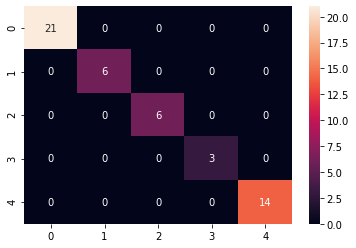

In [30]:
sns.heatmap(cmap1,annot=True)


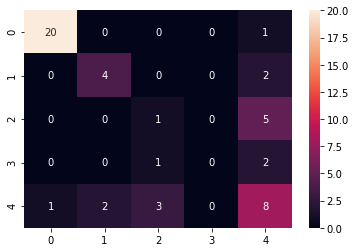

In [31]:
sns.heatmap(cmap2,annot=True)


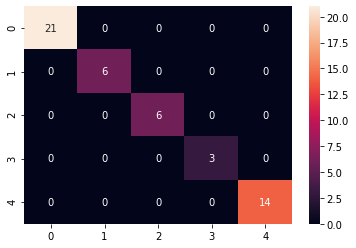

In [32]:
sns.heatmap(cmap3,annot=True)


# Using XGBOOST

In [33]:
xGb = xgboost.XGBClassifier()
xGb.fit(X_train,y_train)
y_testpred= xGb.predict(X_test)


Accuracy is:  0.96


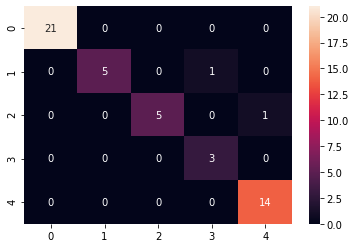

In [34]:
cmap1=confusion_matrix(y_test, y_testpred)
sns.heatmap(cmap1,annot=True)
print('Accuracy is: ', accuracy_score(y_test,y_testpred))